**Relembrando o desafio...**

Você foi contratado(a) como cientista de dados pela operadora de telecomunicações **Alura Voz**. Na reunião inicial com as pessoas responsáveis pela área de vendas da empresa, foi explicada a importância de se **reduzir a Taxa de Evasão** de Clientes, conhecido como **Churn Rate**. Basicamente, o Churn Rate indica o quanto a empresa perdeu de receita ou clientes em um período de tempo.

Com sua experiência, você sugere, como passo inicial, a identificação de clientes que teriam uma maior chance de deixar a empresa. Para isso, você explica que é interessante investigar algumas características de clientes ou dos planos de clientes para tentar **CLASSIFICAR** estas pessoas como potenciais candidatas a deixar a empresa ou não.

Assim, você solicita o conjunto de dados para começar a explorar, tratar e modelar a partir de agora. Em seguida, o foco será na otimização de cada um dos modelos com a finalidade de obter o melhor resultado para a tomada de decisão da **Alura Voz**. 

## Importando dados e bibliotecas

In [21]:
import pandas as pd
pd.set_option('display.max_columns', 100)

import seaborn as sns
import matplotlib as plt
import plotly.express as px
import plotly.graph_objects as go

In [11]:
dados = pd.read_csv('./data_churn_rate_processed.csv')
dados.head()

,id_cliente,churn,genero,idoso,parceiro,dependentes,meses_contrato,servico_telefone,multiplas_linhas,servico_internet,seguranca_online,backup_online,protecao_dispositivo,suporte,streaming_tv,streaming_filmes,contrato,fatura_online,forma_pagamento,cobranca_diaria,cobranca_mensal,cobranca_total
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,2.19,65.6,593.30
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,2.00,59.9,542.40
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.46,73.9,280.85
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.27,98.0,1237.85
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.80,83.9,267.40


## Análise exploratória dos dados

Inicialmente vamos explorar o nosso conjunto de dados tentando encontrar correlações entre nosso atributo classe (`churn`) e o restante das variáveis.

Além disso, também pode ser interessante analisar como as outras variáveis específicas se relacionam entre si.

No           71.198569
Yes          25.719004
undefined     3.082427
Name: churn, dtype: float64


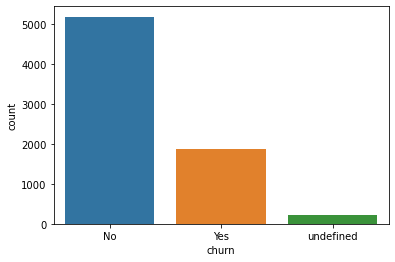

In [155]:
frequencia_churn = dados.churn.value_counts(normalize=True)*100
print(frequencia_churn)

fig = sns.countplot(data=dados, x='churn')

Podemos verificar numericamente e visualmente que a grande maioria dos clientes (71%) não geraram **churn**, enquanto que aproximadamente 26% optaram pelo encerramento dos serviços.

Outros 3% estão com situação indefinida na variável `churn`

Agora vamos realizar uma série de análises entre `churn` e as outras variáveis do dataset, começando pelo **gênero** dos clientes

### Churn X Gênero

In [ ]:
from plotly.subplots import make_subplots

frequencia_genero = dados.genero.value_counts()
cross_churn_genero = pd.crosstab(dados.churn, dados.genero).reset_index()
display(frequencia_genero)
display(cross_churn_genero)

fig = make_subplots(rows=1, cols=2)
fig.add_bar()

fig.add_bar(x=frequencia_genero.index, y=frequencia_genero.values, color=frequencia_genero.index,row=1, col=1)

fig.show()

In [166]:
from plotly.subplots import make_subplots

frequencia_genero = dados.genero.value_counts()
cross_churn_genero = pd.crosstab(dados.churn, dados.genero).reset_index()
display(frequencia_genero)
display(cross_churn_genero)

bar1 = px.bar(x=frequencia_genero.index, y=frequencia_genero.values, labels={'x':'gênero','y':'count'}, text_auto=True, color=frequencia_genero.index, color_discrete_sequence=px.colors.qualitative.G10)

bar2 = px.bar(cross_churn_genero, x='churn', y=["Male","Female"], barmode='group', labels={'value':'count'}, text_auto=True, color_discrete_sequence=px.colors.qualitative.G10)


fig = make_subplots(rows=1, cols=2, subplot_titles=['Histograma da variável churn',"Ocorrência de churn X gênero dos clientes"])
fig.append_trace(bar1['data'][0], row=1, col=1)
fig.append_trace(bar1['data'][1], row=1, col=1)

fig.append_trace(bar2['data'][0], row=1, col=2)
fig.append_trace(bar2['data'][1], row=1, col=2)

fig.update_layout(
    height=600,
    width=1000
)

fig.update_xaxes(showgrid=False, row=1, col=1)
fig.show()

Male      3675
Female    3592
Name: genero, dtype: int64

genero,churn,Female,Male
0,No,2549,2625
1,Yes,939,930
2,undefined,104,120


In [127]:
bar2['data'][0]

AttributeError: 'Bar' object has no attribute 'show'

É possível concluir que não há uma relação clara entre `gênero` e `churn`, já que a distribuição da frequência está parecida nos dois gêneros. 

Isso pode indicar que o serviço está adequado para os diferentes perfis de cliente de acordo com o gênero.

In [57]:
long_df = px.data.medals_long()
long_df

,nation,medal,count
0,South Korea,gold,24
1,China,gold,10
2,Canada,gold,9
3,South Korea,silver,13
4,China,silver,15
5,Canada,silver,12
6,South Korea,bronze,11
7,China,bronze,8
8,Canada,bronze,12
